**Cloning yolov5 repo**





In [5]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


**Changing directory to yolov5**

In [6]:
%cd yolov5/

/content/yolov5


**Step 3: Install Dependencies**

In [7]:
!pip install -U -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Step 4: Run Object Detection on Images. Provide image path. Upload image in the inference/images/ folder**

In [13]:
!python detect.py --source 0 --weights yolov5s.pt --conf 0.4

detect: weights=['yolov5s.pt'], source=0, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-219-ga83d2a5 Python-3.7.15 torch-1.13.0+cu117 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

[ WARN:0@2.337] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
Traceback (most recent call last):
  File "detect.py", line 258, in <module>
    main(opt)
  File "detect.py", line 253, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/gra

**Step 5: Display image in colab**

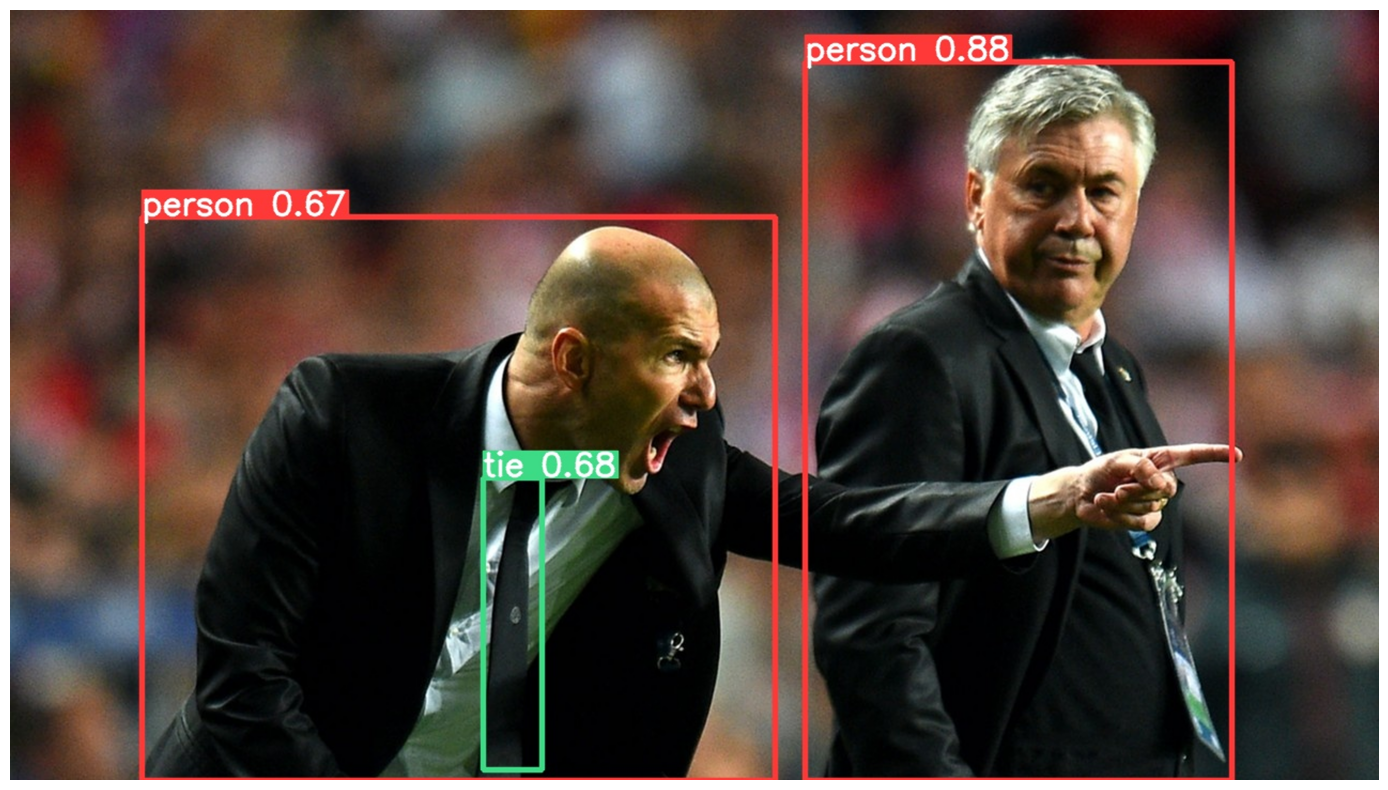

In [11]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("runs/detect/exp2/zidane.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

**Object Detection on Videos. Create a folder under inference/ called "videos", under which you can upload the video file and then provide the file path below**

In [18]:
!python detect.py --source 0 

detect: weights=yolov5s.pt, source=0, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-219-ga83d2a5 Python-3.7.15 torch-1.13.0+cu117 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

[ WARN:0@2.464] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
Traceback (most recent call last):
  File "detect.py", line 258, in <module>
    main(opt)
  File "detect.py", line 253, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_m

In [19]:
import cv2
stream = cv2.VideoCapture(0)

In [20]:
camera_ip = "rtsp://username:password@IP/port"
stream = cv2.VideoCapture(camera_ip)

In [25]:
!python detect.py --weights yolov5s.pt --source 0

detect: weights=['yolov5s.pt'], source=0, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-219-ga83d2a5 Python-3.7.15 torch-1.13.0+cu117 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

[ WARN:0@2.620] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
Traceback (most recent call last):
  File "detect.py", line 258, in <module>
    main(opt)
  File "detect.py", line 253, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/gr

In [14]:
def score_frame(frame, model):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.to(device)
    frame = [torch.tensor(frame)]
    results = self.model(frame)
    labels = results.xyxyn[0][:, -1].numpy()
    cord = results.xyxyn[0][:, :-1].numpy()
    return labels, cord